# Business Problem

* To predict Uber trip demand patterns in NYC to optimize operations, reduce waiting times, and enhance customer experience

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
df = pd.read_csv('Uber-Jan-Feb-FOIL.csv')

# Basic Checks

In [4]:
# Display the first few rows
df.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [5]:
# Diplay last few rows
df.tail()

,dispatching_base_number,date,active_vehicles,trips
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803
353,B02765,2/28/2015,747,7753


In [6]:
# Check column datatypes and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [7]:
# Checking shape
df.shape

(354, 4)

In [8]:
# Checking for missing values
df.isnull().sum()

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64

In [9]:
# Summary statistics for numerical columns
df.describe()

,active_vehicles,trips
count,354.000000,354.000000
mean,1307.435028,11667.316384
std,1162.510626,10648.284865
min,112.000000,629.000000
25%,296.750000,2408.500000
50%,1077.000000,9601.000000
75%,1417.000000,13711.250000
max,4395.000000,45858.000000


In [10]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df.duplicated().sum()

0

In [14]:
df['dispatching_base_number'].nunique()
df['dispatching_base_number'].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

# Exploratory Data Analysis

## Univariate Analysis

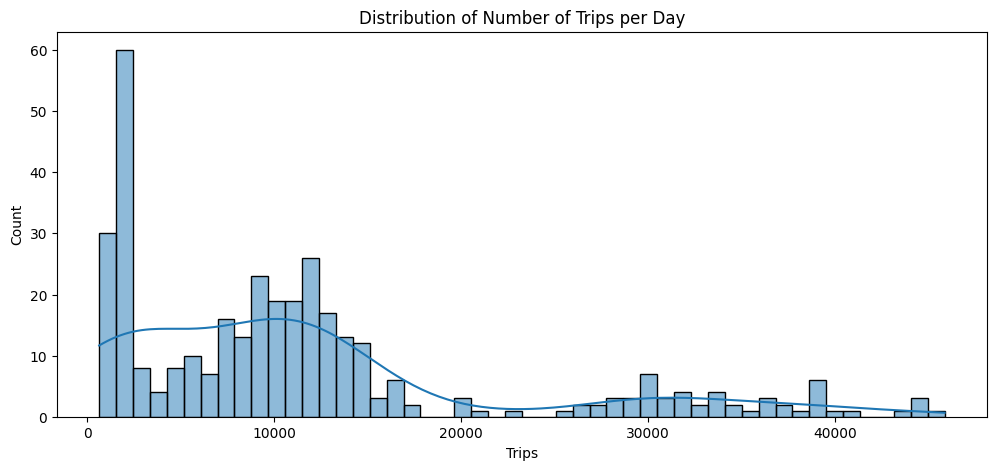

In [15]:
### Distribution of Trips Per Day
plt.figure(figsize=(12, 5))
sns.histplot(df['trips'], bins=50, kde=True)
plt.title("Distribution of Number of Trips per Day")
plt.xlabel("Trips")
plt.show()

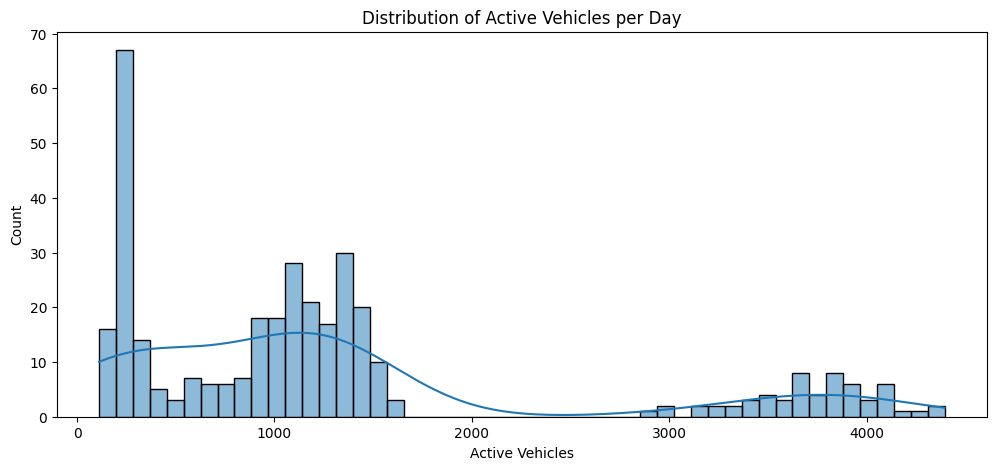

In [16]:
### Distribution of Active Vehicles
plt.figure(figsize=(12, 5))
sns.histplot(df['active_vehicles'], bins=50, kde=True)
plt.title("Distribution of Active Vehicles per Day")
plt.xlabel("Active Vehicles")
plt.show()

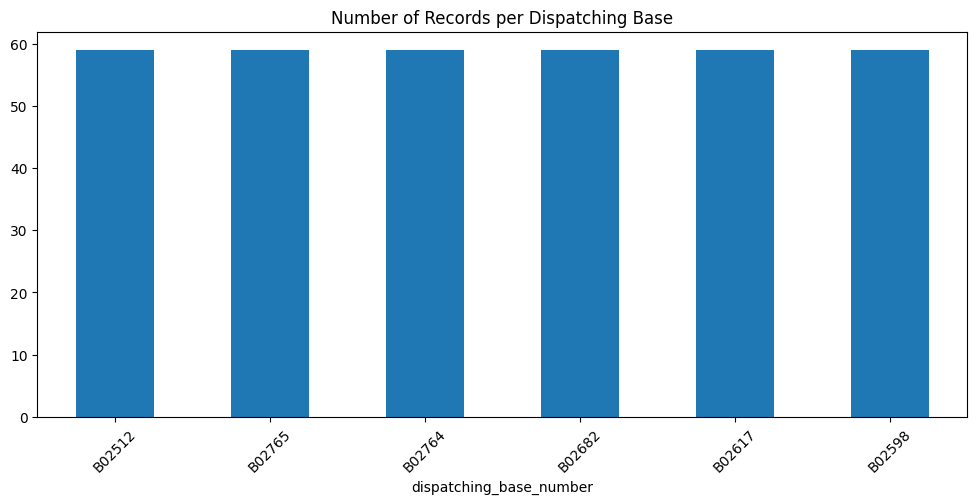

In [17]:
### Frequency of Each Uber Base
plt.figure(figsize=(12, 5))
df['dispatching_base_number'].value_counts().plot(kind='bar', title="Number of Records per Dispatching Base")
plt.xticks(rotation=45)
plt.show()

## Bivariate Analysis

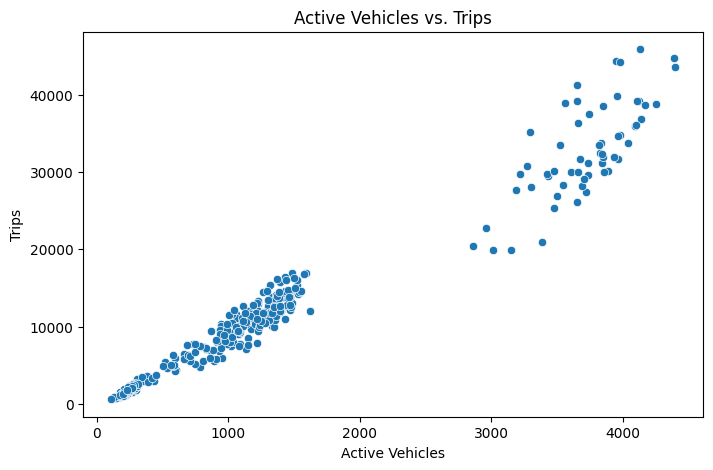

In [18]:
### Relationship Between Active Vehicles and Trips
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='active_vehicles', y='trips')
plt.title("Active Vehicles vs. Trips")
plt.xlabel("Active Vehicles")
plt.ylabel("Trips")
plt.show()

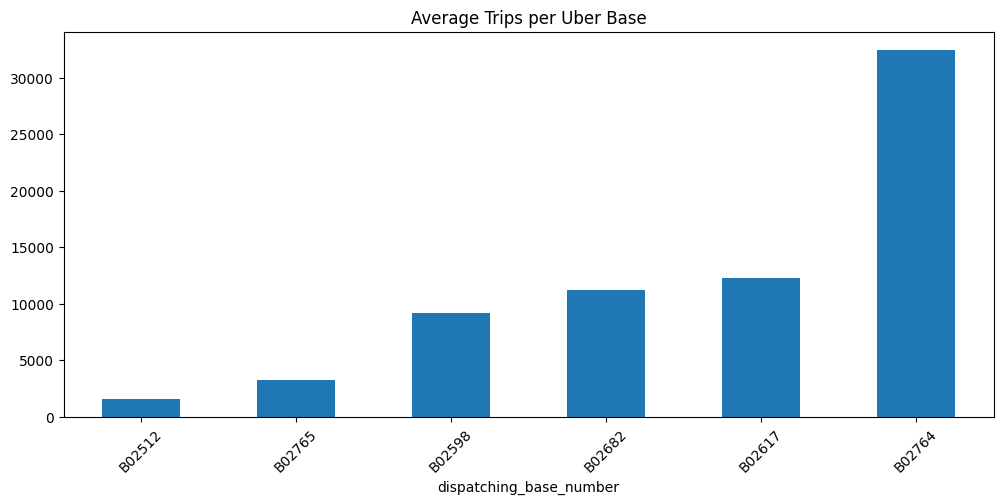

In [19]:
### Average Trips Per Base
df.groupby('dispatching_base_number')['trips'].mean().sort_values().plot(
    kind='bar', figsize=(12, 5), title="Average Trips per Uber Base"
)
plt.xticks(rotation=45)
plt.show()

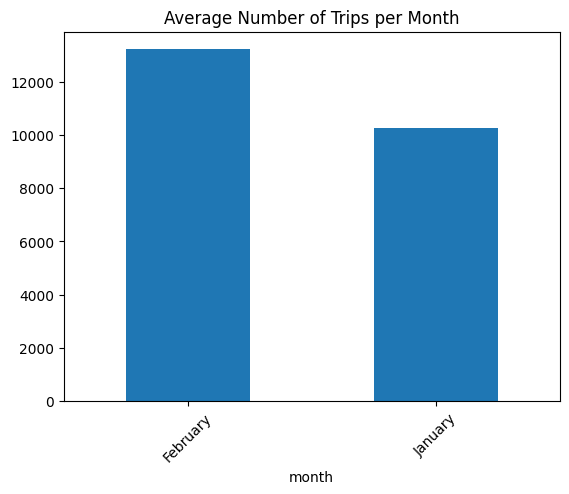

In [20]:
### Trends Over Time: Number of Trips Per Month
df['month'] = df['date'].dt.month_name()
df.groupby('month')['trips'].mean().plot(kind='bar', title="Average Number of Trips per Month")
plt.xticks(rotation=45)
plt.show()

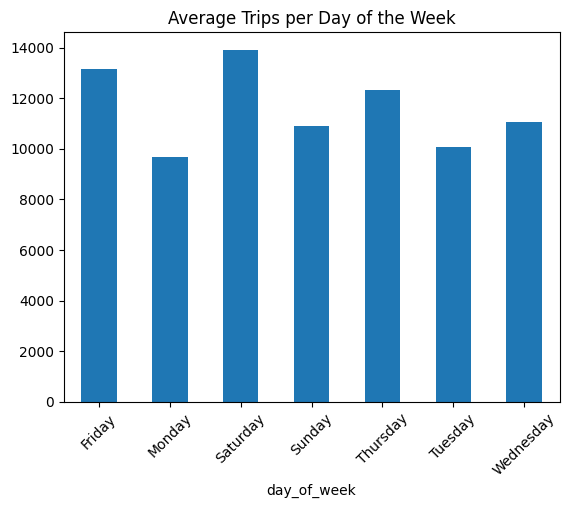

In [21]:
### Which Days Have the Most Trips
df['day_of_week'] = df['date'].dt.day_name()
df.groupby('day_of_week')['trips'].mean().plot(kind='bar', title="Average Trips per Day of the Week")
plt.xticks(rotation=45)
plt.show()

# Multivariate Analysis

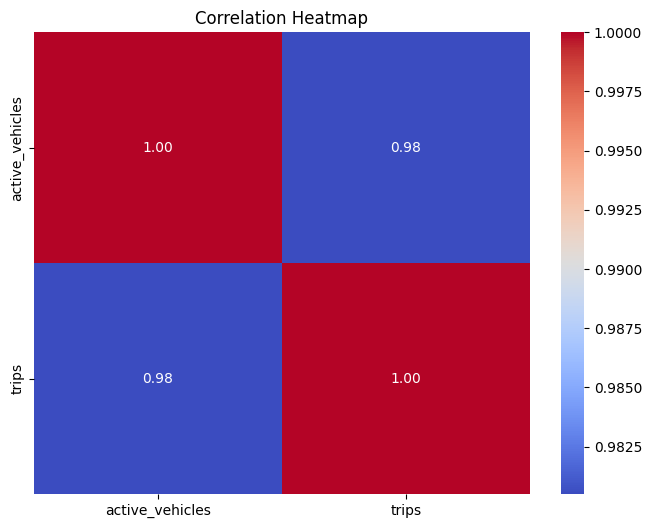

In [22]:
import numpy as np

plt.figure(figsize=(8, 6))
sns.heatmap(df[['active_vehicles', 'trips']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

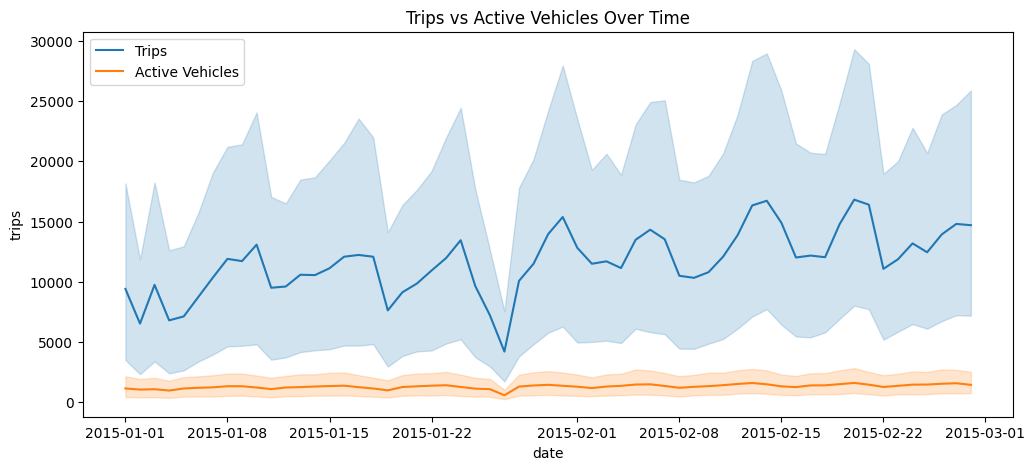

In [23]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='date', y='trips', label='Trips')
sns.lineplot(data=df, x='date', y='active_vehicles', label='Active Vehicles')
plt.legend()
plt.title("Trips vs Active Vehicles Over Time")
plt.show()

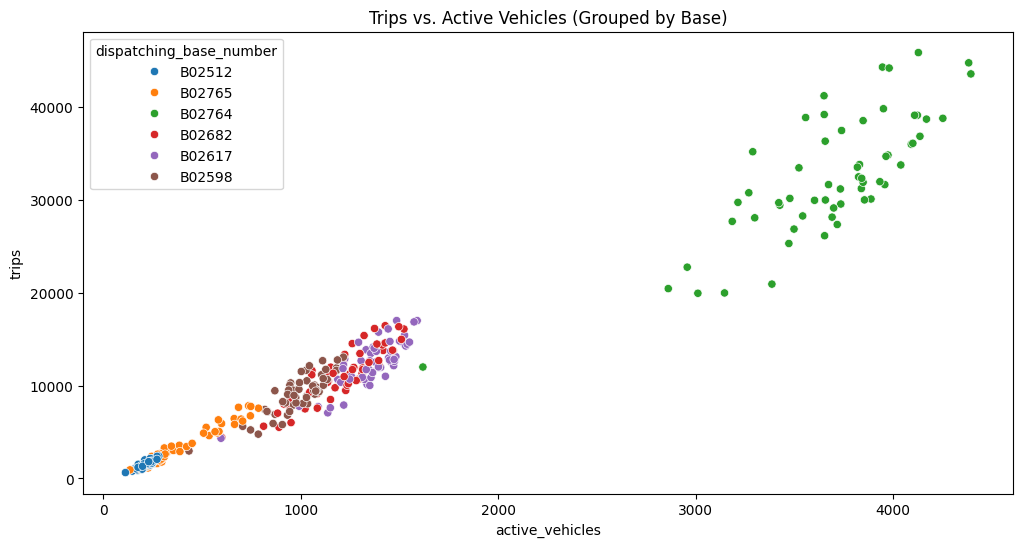

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='active_vehicles', y='trips', hue='dispatching_base_number')
plt.title("Trips vs. Active Vehicles (Grouped by Base)")
plt.show()

In [25]:
df.head()

,dispatching_base_number,date,active_vehicles,trips,month,day_of_week
0,B02512,2015-01-01,190,1132,January,Thursday
1,B02765,2015-01-01,225,1765,January,Thursday
2,B02764,2015-01-01,3427,29421,January,Thursday
3,B02682,2015-01-01,945,7679,January,Thursday
4,B02617,2015-01-01,1228,9537,January,Thursday


# Data Preprocessing

## Handling Missing Values

In [26]:
df.isnull().sum()

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
month                      0
day_of_week                0
dtype: int64

In [27]:
# Extract useful date features:
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day
df['week_of_year'] = df['date'].dt.isocalendar().week

## Handling Outliers

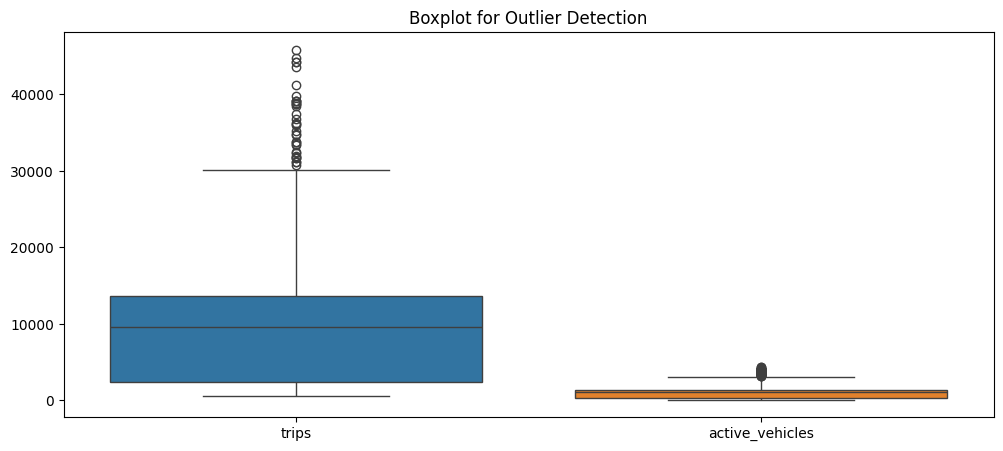

In [28]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['trips', 'active_vehicles']])
plt.title("Boxplot for Outlier Detection")
plt.show()

In [29]:
Q1 = df['trips'].quantile(0.05)
Q3 = df['trips'].quantile(0.95)
df['trips'] = df['trips'].clip(Q1, Q3)

Q1 = df['active_vehicles'].quantile(0.05)
Q3 = df['active_vehicles'].quantile(0.95)
df['active_vehicles'] = df['active_vehicles'].clip(Q1, Q3)

## Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['trips', 'active_vehicles']] = scaler.fit_transform(df[['trips', 'active_vehicles']])

## Feature Engineering

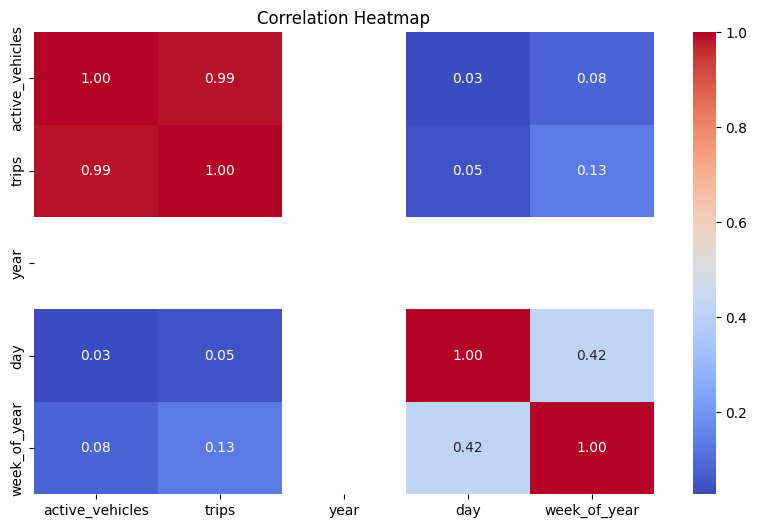

In [32]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select only numerical features
X = df.select_dtypes(include=['int64', 'float64'])

# Add constant for VIF
X_const = add_constant(X)

vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(X.shape[1])]

print(vif)

          features        VIF
0  active_vehicles  34.045577
1            trips  34.045577


In [34]:
df.head()

,dispatching_base_number,date,active_vehicles,trips,month,day_of_week,year,day,week_of_year
0,B02512,2015-01-01,-0.965986,-1.009639,January,Thursday,2015,1,1
1,B02765,2015-01-01,-0.944876,-0.964741,January,Thursday,2015,1,1
2,B02764,2015-01-01,1.871567,1.784208,January,Thursday,2015,1,1
3,B02682,2015-01-01,-0.311572,-0.376902,January,Thursday,2015,1,1
4,B02617,2015-01-01,-0.062648,-0.192220,January,Thursday,2015,1,1


In [35]:
# Columns to drop
cols_to_drop = ['date', 'year']

# Drop the columns
df = df.drop(columns=cols_to_drop)

# Display the updated DataFrame
df.head()

,dispatching_base_number,active_vehicles,trips,month,day_of_week,day,week_of_year
0,B02512,-0.965986,-1.009639,January,Thursday,1,1
1,B02765,-0.944876,-0.964741,January,Thursday,1,1
2,B02764,1.871567,1.784208,January,Thursday,1,1
3,B02682,-0.311572,-0.376902,January,Thursday,1,1
4,B02617,-0.062648,-0.192220,January,Thursday,1,1


In [36]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'month'
df['month'] = le.fit_transform(df['month'])

# Encode 'day_of_week'
df['day_of_week'] = le.fit_transform(df['day_of_week'])

# Encode 'dispatching_base_number'
df['dispatching_base_number'] = le.fit_transform(df['dispatching_base_number'])

# Check the final DataFrame
df.head()

,dispatching_base_number,active_vehicles,trips,month,day_of_week,day,week_of_year
0,0,-0.965986,-1.009639,1,4,1,1
1,5,-0.944876,-0.964741,1,4,1,1
2,4,1.871567,1.784208,1,4,1,1
3,3,-0.311572,-0.376902,1,4,1,1
4,2,-0.062648,-0.192220,1,4,1,1


# Model Creation

In [37]:
# Separate features and target
X = df.drop('trips', axis=1)
y = df['trips']

In [38]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Models

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regresssion

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression R2 Score: 0.9826257798185791


In [42]:
print("Linear Regresssion MAE :", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regresssion MSE :", mean_squared_error(y_test, y_pred_lr))

Linear Regresssion MAE : 0.10239812751765504
Linear Regresssion MSE : 0.01742251737734576


In [43]:
from sklearn.model_selection import cross_val_score

cv_lr = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
print("Cross-Validated R2 Scores:", cv_lr)
print("Mean R2:", cv_lr.mean())

Cross-Validated R2 Scores: [0.9544219  0.97730395 0.97620486 0.98603785 0.98519519]
Mean R2: 0.975832750661468


# Decision Tree Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree R2 Score:", r2_score(y_test, y_pred_dt))
print("Decision Tree MAE Score:", mean_absolute_error(y_test, y_pred_dt))
print("Decision Tree MSE Score:", mean_squared_error(y_test, y_pred_dt))

Decision Tree R2 Score: 0.9732583189462087
Decision Tree MAE Score: 0.11347288089744274
Decision Tree MSE Score: 0.026816018100043037


In [45]:
from sklearn.model_selection import GridSearchCV

dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='r2')
dt_grid.fit(X_train, y_train)

print("Best Parameters:", dt_grid.best_params_)
print("Tuned Decision Tree R2:", dt_grid.score(X_test, y_test))

Best Parameters: {'max_depth': 5, 'min_samples_split': 5}
Tuned Decision Tree R2: 0.9645960831244292


In [46]:
cv_dt = cross_val_score(dt_grid.best_estimator_, X, y, cv=5, scoring='r2')
print("Cross-Validated R2 Scores:", cv_dt)
print("Mean R2:", cv_dt.mean())

Cross-Validated R2 Scores: [0.92140077 0.97271707 0.9623781  0.9720391  0.98301644]
Mean R2: 0.9623102962008152


# SVR

In [47]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("SVR R2 Score:", r2_score(y_test, y_pred_svr))
print("SVR MAE Score:", mean_absolute_error(y_test, y_pred_svr))
print("SVR MSE Score:", mean_squared_error(y_test, y_pred_svr))

SVR R2 Score: 0.8957503735118107
SVR MAE Score: 0.21545703476718175
SVR MSE Score: 0.10453942163197223


In [48]:
svr_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'epsilon': [0.01, 0.1, 1]
}

svr_grid = GridSearchCV(SVR(), svr_params, cv=5, scoring='r2')
svr_grid.fit(X_train, y_train)

print("Best Parameters:", svr_grid.best_params_)
print("Tuned SVR R2:", svr_grid.score(X_test, y_test))

Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Tuned SVR R2: 0.9824916057831505


In [49]:
cv_svr = cross_val_score(svr_grid.best_estimator_, X, y, cv=5, scoring='r2')
print("Cross-Validated R2 Scores:", cv_svr)
print("Mean R2:", cv_svr.mean())

Cross-Validated R2 Scores: [0.9503557  0.97396668 0.94916967 0.98575881 0.8829829 ]
Mean R2: 0.9484467519738231


# KNN

In [50]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN R2 Score:", r2_score(y_test, y_pred_knn))
print("KNN MAE Score:", mean_absolute_error(y_test, y_pred_knn))
print("KNN MSE Score:", mean_squared_error(y_test, y_pred_knn))

KNN R2 Score: 0.4390840398071143
KNN MAE Score: 0.5604159715575608
KNN MSE Score: 0.5624752053126049


In [51]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='r2')
knn_grid.fit(X_train, y_train)

print("Best Parameters:", knn_grid.best_params_)
print("Tuned KNN R2:", knn_grid.score(X_test, y_test))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Tuned KNN R2: 0.5887552668890776


In [52]:
cv_knn = cross_val_score(knn_grid.best_estimator_, X, y, cv=5, scoring='r2')
print("Cross-Validated R2 Scores:", cv_knn)
print("Mean R2:", cv_knn.mean())


Cross-Validated R2 Scores: [0.84022144 0.84801666 0.81231721 0.86735066 0.86177668]
Mean R2: 0.8459365278294749


# Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE Score:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest MSE Score:", mean_squared_error(y_test, y_pred_rf))

Random Forest R2 Score: 0.9811078374350031
Random Forest MAE Score: 0.09611425831317448
Random Forest MSE Score: 0.01894467936674796


In [54]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)

print("Best Parameters:", rf_grid.best_params_)
print("Tuned Random Forest R2:", rf_grid.score(X_test, y_test))

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest R2: 0.9811129198221644


In [55]:
cv_rf = cross_val_score(rf_grid.best_estimator_, X, y, cv=5, scoring='r2')
print("Cross-Validated R2 Scores:", cv_rf)
print("Mean R2:", cv_rf.mean())

Cross-Validated R2 Scores: [0.93096524 0.97560555 0.97136515 0.98925549 0.98769684]
Mean R2: 0.9709776547388627


# Bagging

In [56]:
from sklearn.ensemble import BaggingRegressor

bag = BaggingRegressor(random_state=42)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

print("Bagging Regressor R2 Score:", r2_score(y_test, y_pred_bag))
print("Bagging Regressor MAE Score:", mean_absolute_error(y_test, y_pred_bag))
print("Bagging Regressor MSE Score:", mean_squared_error(y_test, y_pred_bag))

Bagging Regressor R2 Score: 0.9753882907786635
Bagging Regressor MAE Score: 0.10682103177567195
Bagging Regressor MSE Score: 0.0246801253303702


In [57]:
bag_params = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

bag_grid = GridSearchCV(BaggingRegressor(random_state=42), bag_params, cv=5, scoring='r2')
bag_grid.fit(X_train, y_train)

print("Best Parameters:", bag_grid.best_params_)
print("Tuned Bagging R2:", bag_grid.score(X_test, y_test))


Best Parameters: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}
Tuned Bagging R2: 0.9804805240927358


In [58]:
cv_bag = cross_val_score(bag_grid.best_estimator_, X, y, cv=5, scoring='r2')
print("Cross-Validated R2 Scores:", cv_bag)
print("Mean R2:", cv_bag.mean())

Cross-Validated R2 Scores: [0.93059974 0.97560692 0.97120768 0.98876988 0.98739113]
Mean R2: 0.9707150671298367


# Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("Gradient Boosting R2 Score:", r2_score(y_test, y_pred_gbr))

Gradient Boosting R2 Score: 0.9838839278074082


In [60]:
gbr_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

gbr_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gbr_params, cv=5, scoring='r2')
gbr_grid.fit(X_train, y_train)

print("Best Parameters:", gbr_grid.best_params_)
print("Tuned GBR R2:", gbr_grid.score(X_test, y_test))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Tuned GBR R2: 0.9837148122969017


In [61]:
cv_gbr = cross_val_score(gbr_grid.best_estimator_, X, y, cv=5, scoring='r2')
print("Cross-Validated R2 Scores:", cv_gbr)
print("Mean R2:", cv_gbr.mean())

Cross-Validated R2 Scores: [0.92076354 0.97625907 0.9726965  0.98585637 0.98569129]
Mean R2: 0.9682533534859408


# AdaBoost Regressor

In [62]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("AdaBoost R2 Score:", r2_score(y_test, y_pred_ada))
print("AdaBoost MAE Score:", mean_absolute_error(y_test, y_pred_ada))
print("AdaBoost MSE Score:", mean_squared_error(y_test, y_pred_ada))

AdaBoost R2 Score: 0.9748274567140498
AdaBoost MAE Score: 0.12033125783525916
AdaBoost MSE Score: 0.025242518412448706


In [63]:
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

ada_grid = GridSearchCV(AdaBoostRegressor(random_state=42), ada_params, cv=5, scoring='r2')
ada_grid.fit(X_train, y_train)

print("Best Parameters:", ada_grid.best_params_)
print("Tuned AdaBoost R2:", ada_grid.score(X_test, y_test))

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Tuned AdaBoost R2: 0.9727088388171471


In [64]:
cv_ada = cross_val_score(ada_grid.best_estimator_, X, y, cv=5, scoring='r2')
print("Cross-Validated R2 Scores:", cv_ada)
print("Mean R2:", cv_ada.mean())

Cross-Validated R2 Scores: [0.92371083 0.96741731 0.96942361 0.97830835 0.97857987]
Mean R2: 0.9634879953396176


## Storing all models results

In [68]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Dictionary to store results
results = {
    "Model": [],
    "R2 Score": [],
    "MAE": [],
    "RMSE": []
}

# List of models
models = {
    "Linear Regression": lr,
    "Decision Tree": dt,
    "SVR": svr,
    "KNN": knn,
    "Random Forest": rf,
    "Bagging Regressor": bag,
    "Gradient Boosting": gbr,
    "AdaBoost": ada
}

# Loop through models and evaluate
for name, model in models.items():
    y_pred = model.predict(X_test)
    results["Model"].append(name)
    results["R2 Score"].append(r2_score(y_test, y_pred))
    results["MAE"].append(mean_absolute_error(y_test, y_pred))
    results["RMSE"].append(np.sqrt(mean_squared_error(y_test, y_pred)))

results_df = pd.DataFrame(results)
print(results_df.sort_values(by="R2 Score", ascending=False))

               Model  R2 Score       MAE      RMSE
6  Gradient Boosting  0.983884  0.084694  0.127125
0  Linear Regression  0.982626  0.102398  0.131994
4      Random Forest  0.981108  0.096114  0.137640
5  Bagging Regressor  0.975388  0.106821  0.157099
7           AdaBoost  0.974827  0.120331  0.158879
1      Decision Tree  0.973258  0.113473  0.163756
2                SVR  0.895750  0.215457  0.323326
3                KNN  0.439084  0.560416  0.749983


## Plottig the Model Performance

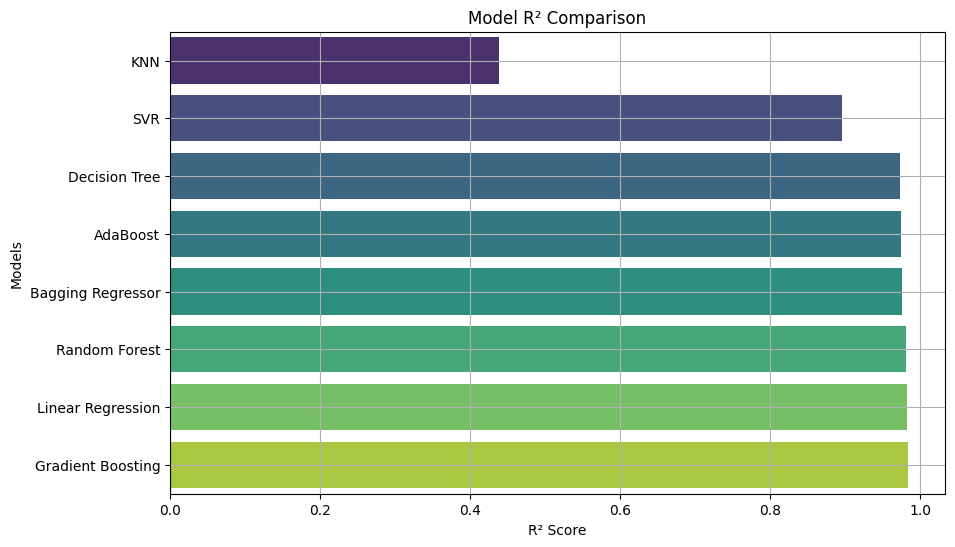

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="R2 Score", y="Model", data=results_df.sort_values(by="R2 Score", ascending=True), palette="viridis")
plt.title("Model R² Comparison")
plt.xlabel("R² Score")
plt.ylabel("Models")
plt.grid(True)
plt.show()

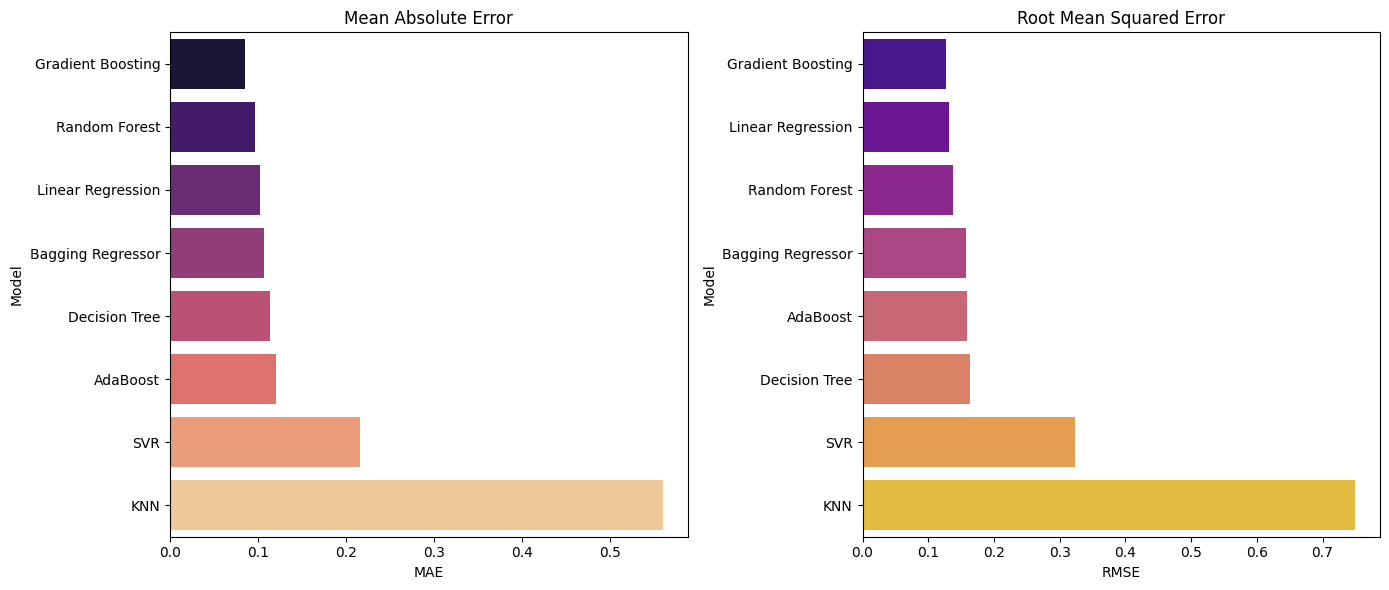

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# MAE plot
sns.barplot(x="MAE", y="Model", data=results_df.sort_values(by="MAE"), ax=ax[0], palette="magma")
ax[0].set_title("Mean Absolute Error")

# RMSE plot
sns.barplot(x="RMSE", y="Model", data=results_df.sort_values(by="RMSE"), ax=ax[1], palette="plasma")
ax[1].set_title("Root Mean Squared Error")

plt.tight_layout()
plt.show()

# Best Model

# ✅ Conclusion:
#### Gradient Boosting gave the best results overall and should be selected for production.

* Linear Regression also showed excellent results with less complexity.

* KNN and SVR are not suitable for this dataset.

# 🧩 Challenges Faced Report
#### 1. Categorical Encoding:
* Categorical features like dispatching_base_number, month, and day_of_week had to be encoded.

* Decided to use Label Encoding for simplicity and to maintain ordinal relation in tree-based models.

#### 2. Feature Selection:
* Columns like date, day, year, week_of_year were dropped due to low correlation with the target.

* Ensured multicollinearity didn’t affect models by checking correlation heatmap.

#### 3. Scaling:
* Applied StandardScaler for algorithms sensitive to scale (e.g., SVR, KNN).

* Tree-based models like Random Forest and Gradient Boosting don’t require scaling.

#### 4. Model Training Time:
* Ensemble methods (Random Forest, Boosting) took significantly longer to train compared to Linear Regression.

* Used GridSearchCV and cross-validation, which increased training time but improved performance.

#### 5. Overfitting Risk:
* Decision Tree and Bagging showed signs of overfitting without tuning.

* Cross-validation helped identify and mitigate this issue.

#### 6. Evaluation:
* Used R², MAE, and RMSE for better understanding of model performance.

* RMSE helped highlight models with high variability.